In [95]:
import pandas as pd

In [96]:
df = pd.read_csv('Response.csv')
df

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1
...,...,...
6879,CS8996,0
6880,CS8997,0
6881,CS8998,0
6882,CS8999,0


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6884 entries, 0 to 6883
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  6884 non-null   object
 1   response     6884 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 107.7+ KB


In [98]:
#checking for null values
df.isnull().sum()

customer_id    0
response       0
dtype: int64

In [99]:
#checking duplicates value
df.duplicated().sum()

np.int64(0)

In [100]:
pf = pd.read_csv('Transactions.csv')
pf

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78
...,...,...,...
124995,CS8433,26-Jun-11,64
124996,CS7232,19-Aug-14,38
124997,CS8731,28-Nov-14,42
124998,CS8133,14-Dec-13,13


In [101]:
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  125000 non-null  object
 1   trans_date   125000 non-null  object
 2   tran_amount  125000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.9+ MB


In [102]:
#checking null values
pf.isnull().sum()

customer_id    0
trans_date     0
tran_amount    0
dtype: int64

In [103]:
#checking duplicate value
pf.duplicated(subset=['customer_id']).sum()

np.int64(118111)

In [104]:
# getting total number of unique customers 

pf['customer_id'].nunique()

6889

In [105]:
df['customer_id'].nunique()

6884

In [106]:
# finding of customers which are not present in response dataset

miss_id = pf.loc[~pf['customer_id'].isin(df['customer_id']),'customer_id'].unique()
miss_id

array(['CS7297', 'CS7638', 'CS7413', 'CS8376', 'CS8753'], dtype=object)

In [107]:
#adding missing customers to the response table

new = pd.DataFrame({'customer_id':['CS7297', 'CS7638', 'CS7413', 'CS8376', 'CS8753'],
                    'response':[0,0,0,0,0]})
df = pd.concat([df,new], ignore_index=True)
df

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1
...,...,...
6884,CS7297,0
6885,CS7638,0
6886,CS7413,0
6887,CS8376,0


In [108]:
#finding total amount paid by each customers

amount = pf.groupby('customer_id')['tran_amount'].sum().reset_index()
amount.rename(columns={'tran_amount':'total_amount'}, inplace=True)
amount

,customer_id,total_amount
0,CS1112,1012
1,CS1113,1490
2,CS1114,1432
3,CS1115,1659
4,CS1116,857
...,...,...
6884,CS8996,582
6885,CS8997,543
6886,CS8998,624
6887,CS8999,383


In [109]:
df = df.merge(amount, on='customer_id', how='left')
df

,customer_id,response,total_amount
0,CS1112,0,1012
1,CS1113,0,1490
2,CS1114,1,1432
3,CS1115,1,1659
4,CS1116,1,857
...,...,...,...
6884,CS7297,0,251
6885,CS7638,0,275
6886,CS7413,0,349
6887,CS8376,0,239


In [110]:
#finding how many times each customer arrives in years

cust = pf.groupby('customer_id')['customer_id'].size().reset_index(name='times_arrive')
cust

,customer_id,times_arrive
0,CS1112,15
1,CS1113,20
2,CS1114,19
3,CS1115,22
4,CS1116,13
...,...,...
6884,CS8996,13
6885,CS8997,14
6886,CS8998,13
6887,CS8999,12


In [111]:
df = df.merge(cust, on='customer_id', how='left')
df

,customer_id,response,total_amount,times_arrive
0,CS1112,0,1012,15
1,CS1113,0,1490,20
2,CS1114,1,1432,19
3,CS1115,1,1659,22
4,CS1116,1,857,13
...,...,...,...,...
6884,CS7297,0,251,5
6885,CS7638,0,275,5
6886,CS7413,0,349,6
6887,CS8376,0,239,4


In [112]:
#finding the latest date according to data

pf['trans_date'] = pd.to_datetime(pf['trans_date'])
pf

C:\Users\Abhay Sirsikar\AppData\Local\Temp\ipykernel_24332\3811913791.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pf['trans_date'] = pd.to_datetime(pf['trans_date'])


,customer_id,trans_date,tran_amount
0,CS5295,2013-02-11,35
1,CS4768,2015-03-15,39
2,CS2122,2013-02-26,52
3,CS1217,2011-11-16,99
4,CS1850,2013-11-20,78
...,...,...,...
124995,CS8433,2011-06-26,64
124996,CS7232,2014-08-19,38
124997,CS8731,2014-11-28,42
124998,CS8133,2013-12-14,13


In [113]:
max_date = pf['trans_date'].max()
max_date

Timestamp('2015-03-16 00:00:00')

In [114]:
#finding last purchase date of each customer

last = pf.groupby('customer_id')['trans_date'].max().reset_index(name='last_purchase')
last

,customer_id,last_purchase
0,CS1112,2015-01-14
1,CS1113,2015-02-09
2,CS1114,2015-02-12
3,CS1115,2015-03-05
4,CS1116,2014-08-25
...,...,...
6884,CS8996,2014-12-09
6885,CS8997,2014-06-28
6886,CS8998,2014-12-22
6887,CS8999,2014-07-02


In [115]:
df = df.merge(last, on='customer_id', how='left')
df

,customer_id,response,total_amount,times_arrive,last_purchase
0,CS1112,0,1012,15,2015-01-14
1,CS1113,0,1490,20,2015-02-09
2,CS1114,1,1432,19,2015-02-12
3,CS1115,1,1659,22,2015-03-05
4,CS1116,1,857,13,2014-08-25
...,...,...,...,...,...
6884,CS7297,0,251,5,2013-03-03
6885,CS7638,0,275,5,2012-11-09
6886,CS7413,0,349,6,2013-02-09
6887,CS8376,0,239,4,2012-12-03


In [116]:
df['max_date'] = '2015-03-16'
df

,customer_id,response,total_amount,times_arrive,last_purchase,max_date
0,CS1112,0,1012,15,2015-01-14,2015-03-16
1,CS1113,0,1490,20,2015-02-09,2015-03-16
2,CS1114,1,1432,19,2015-02-12,2015-03-16
3,CS1115,1,1659,22,2015-03-05,2015-03-16
4,CS1116,1,857,13,2014-08-25,2015-03-16
...,...,...,...,...,...,...
6884,CS7297,0,251,5,2013-03-03,2015-03-16
6885,CS7638,0,275,5,2012-11-09,2015-03-16
6886,CS7413,0,349,6,2013-02-09,2015-03-16
6887,CS8376,0,239,4,2012-12-03,2015-03-16


In [117]:
#calculating (Recency = latest date - customer last purchase)
df['last_purchase'] = pd.to_datetime(df['last_purchase'])
df['max_date'] = pd.to_datetime(df['max_date'])

In [118]:
df['Recency'] = (df['max_date']-df['last_purchase']).dt.days
df

,customer_id,response,total_amount,times_arrive,last_purchase,max_date,Recency
0,CS1112,0,1012,15,2015-01-14,2015-03-16,61
1,CS1113,0,1490,20,2015-02-09,2015-03-16,35
2,CS1114,1,1432,19,2015-02-12,2015-03-16,32
3,CS1115,1,1659,22,2015-03-05,2015-03-16,11
4,CS1116,1,857,13,2014-08-25,2015-03-16,203
...,...,...,...,...,...,...,...
6884,CS7297,0,251,5,2013-03-03,2015-03-16,743
6885,CS7638,0,275,5,2012-11-09,2015-03-16,857
6886,CS7413,0,349,6,2013-02-09,2015-03-16,765
6887,CS8376,0,239,4,2012-12-03,2015-03-16,833


In [119]:
#calculating score ( 5-good, 1-worst )

df['r_score'] = pd.qcut(df['Recency'], 5, labels=[5,4,3,2,1])
df['f_score'] = pd.qcut(df['times_arrive'], 5, labels=[1,2,3,4,5])
df['m_score'] = pd.qcut(df['total_amount'], 5, labels=[1,2,3,4,5])

In [120]:
df

,customer_id,response,total_amount,times_arrive,last_purchase,max_date,Recency,r_score,f_score,m_score
0,CS1112,0,1012,15,2015-01-14,2015-03-16,61,3,2,2
1,CS1113,0,1490,20,2015-02-09,2015-03-16,35,4,4,4
2,CS1114,1,1432,19,2015-02-12,2015-03-16,32,4,3,4
3,CS1115,1,1659,22,2015-03-05,2015-03-16,11,5,4,5
4,CS1116,1,857,13,2014-08-25,2015-03-16,203,1,1,2
...,...,...,...,...,...,...,...,...,...,...
6884,CS7297,0,251,5,2013-03-03,2015-03-16,743,1,1,1
6885,CS7638,0,275,5,2012-11-09,2015-03-16,857,1,1,1
6886,CS7413,0,349,6,2013-02-09,2015-03-16,765,1,1,1
6887,CS8376,0,239,4,2012-12-03,2015-03-16,833,1,1,1


In [121]:
df['RFM_score'] = df['r_score'].astype(str) + df['f_score'].astype(str) + df['m_score'].astype(str)
df

,customer_id,response,total_amount,times_arrive,last_purchase,max_date,Recency,r_score,f_score,m_score,RFM_score
0,CS1112,0,1012,15,2015-01-14,2015-03-16,61,3,2,2,322
1,CS1113,0,1490,20,2015-02-09,2015-03-16,35,4,4,4,444
2,CS1114,1,1432,19,2015-02-12,2015-03-16,32,4,3,4,434
3,CS1115,1,1659,22,2015-03-05,2015-03-16,11,5,4,5,545
4,CS1116,1,857,13,2014-08-25,2015-03-16,203,1,1,2,112
...,...,...,...,...,...,...,...,...,...,...,...
6884,CS7297,0,251,5,2013-03-03,2015-03-16,743,1,1,1,111
6885,CS7638,0,275,5,2012-11-09,2015-03-16,857,1,1,1,111
6886,CS7413,0,349,6,2013-02-09,2015-03-16,765,1,1,1,111
6887,CS8376,0,239,4,2012-12-03,2015-03-16,833,1,1,1,111


In [122]:
def segment_customer(row):
    if row['r_score'] >= 4 and row['f_score'] >= 4 and row['m_score'] >= 4:
        return 'VIP'
    elif row['f_score'] >= 3 and row['m_score'] >= 3:
        return 'Loyal'
    elif row['f_score'] >= 2 and row['m_score'] >= 2 and row['r_score'] >= 3:
        return 'Regular'
    elif row['r_score'] >= 4 and row['f_score'] <= 2:
        return 'New'
    else:
        return 'Lost'

df['Segment'] = df.apply(segment_customer, axis=1)
df

,customer_id,response,total_amount,times_arrive,last_purchase,max_date,Recency,r_score,f_score,m_score,RFM_score,Segment
0,CS1112,0,1012,15,2015-01-14,2015-03-16,61,3,2,2,322,Regular
1,CS1113,0,1490,20,2015-02-09,2015-03-16,35,4,4,4,444,VIP
2,CS1114,1,1432,19,2015-02-12,2015-03-16,32,4,3,4,434,Loyal
3,CS1115,1,1659,22,2015-03-05,2015-03-16,11,5,4,5,545,VIP
4,CS1116,1,857,13,2014-08-25,2015-03-16,203,1,1,2,112,Lost
...,...,...,...,...,...,...,...,...,...,...,...,...
6884,CS7297,0,251,5,2013-03-03,2015-03-16,743,1,1,1,111,Lost
6885,CS7638,0,275,5,2012-11-09,2015-03-16,857,1,1,1,111,Lost
6886,CS7413,0,349,6,2013-02-09,2015-03-16,765,1,1,1,111,Lost
6887,CS8376,0,239,4,2012-12-03,2015-03-16,833,1,1,1,111,Lost


In [123]:
df.to_csv('RFM.csv', index=False)
df

,customer_id,response,total_amount,times_arrive,last_purchase,max_date,Recency,r_score,f_score,m_score,RFM_score,Segment
0,CS1112,0,1012,15,2015-01-14,2015-03-16,61,3,2,2,322,Regular
1,CS1113,0,1490,20,2015-02-09,2015-03-16,35,4,4,4,444,VIP
2,CS1114,1,1432,19,2015-02-12,2015-03-16,32,4,3,4,434,Loyal
3,CS1115,1,1659,22,2015-03-05,2015-03-16,11,5,4,5,545,VIP
4,CS1116,1,857,13,2014-08-25,2015-03-16,203,1,1,2,112,Lost
...,...,...,...,...,...,...,...,...,...,...,...,...
6884,CS7297,0,251,5,2013-03-03,2015-03-16,743,1,1,1,111,Lost
6885,CS7638,0,275,5,2012-11-09,2015-03-16,857,1,1,1,111,Lost
6886,CS7413,0,349,6,2013-02-09,2015-03-16,765,1,1,1,111,Lost
6887,CS8376,0,239,4,2012-12-03,2015-03-16,833,1,1,1,111,Lost


## DATA VISUALIZATION 

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

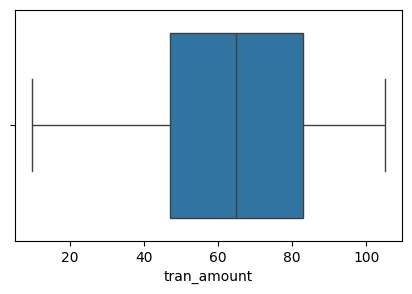

In [125]:
#tran_amount boxplot
plt.figure(figsize=(5,3))
sns.boxplot(x=pf['tran_amount'])
plt.show()

In [126]:
#which 3 months have highest transaction value

pf['month'] = pf['trans_date'].dt.month
tran = pf.groupby('month')['tran_amount'].sum()
tran.sort_values(ascending=False).head(3)

month
8     726921
10    725320
1     724107
Name: tran_amount, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

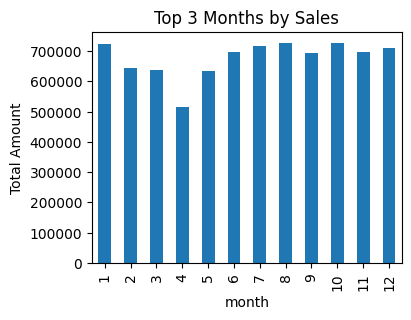

In [127]:
tran.plot(kind='bar', figsize=(4,3))
plt.title("Top 3 Months by Sales")
plt.ylabel("Total Amount")
plt.show

<Axes: ylabel='count'>

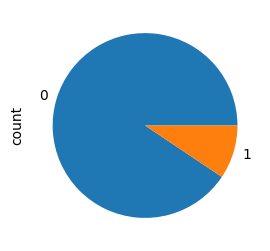

In [128]:
df['response'].value_counts().plot(kind='pie',figsize=(5,3))

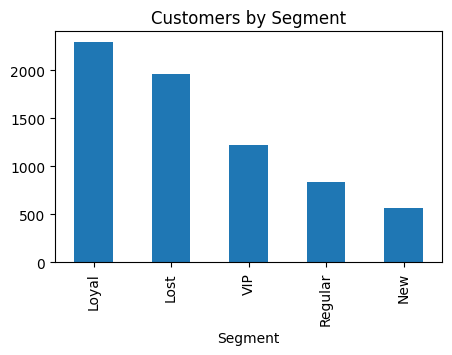

In [129]:
#Number of customers per segment
df['Segment'].value_counts().plot(kind='bar',figsize=(5,3))
plt.title("Customers by Segment")
plt.show()

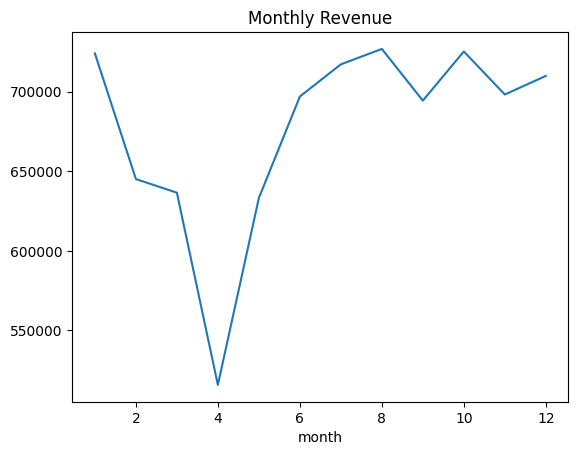

In [130]:
#Revenue by month
pf.groupby('month')['tran_amount'].sum().plot()
plt.title("Monthly Revenue")
plt.show()

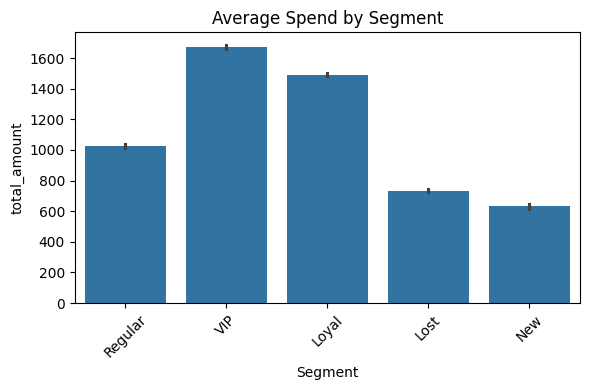

In [131]:
#Average Spend by Segment

plt.figure(figsize=(6,4))
sns.barplot(x='Segment', y='total_amount', data=df)
plt.title("Average Spend by Segment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [137]:
#customers having the highest number of orders
max_cust = df.groupby('customer_id',as_index=False)['times_arrive'].sum().sort_values(by='times_arrive',ascending=False).head(5)
max_cust

,customer_id,times_arrive
3312,CS4424,39
3208,CS4320,38
2687,CS3799,36
2693,CS3805,35
1508,CS2620,35


<Axes: xlabel='customer_id', ylabel='times_arrive'>

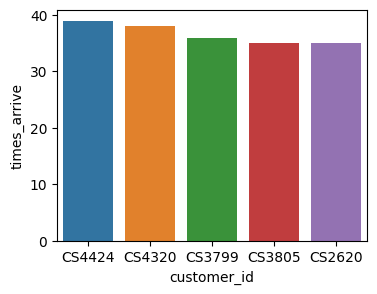

In [147]:
plt.figure(figsize=(4, 3))
sns.barplot(x='customer_id',y='times_arrive',data=max_cust,hue='customer_id')

In [188]:
#TIME ANALYSIS
pf['month'] = pf['trans_date'].dt.month
mon_sale = pf.groupby('month',as_index=False)['tran_amount'].sum().sort_values(by='month',ascending=True)
mon_sale

,month,tran_amount
0,1,724107
1,2,645154
2,3,636577
3,4,515791
4,5,633212
5,6,697014
6,7,717223
7,8,726921
8,9,694433
9,10,725320


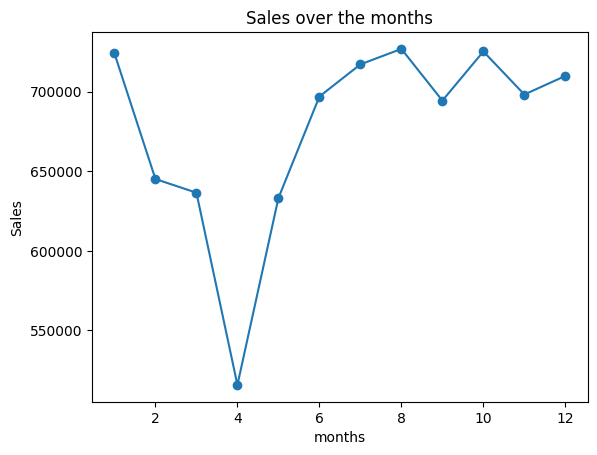

In [192]:
plt.plot(mon_sale['month'],mon_sale['tran_amount'],marker='o')
plt.xlabel('months')
plt.ylabel('Sales')
plt.title('Sales over the months')
plt.show()

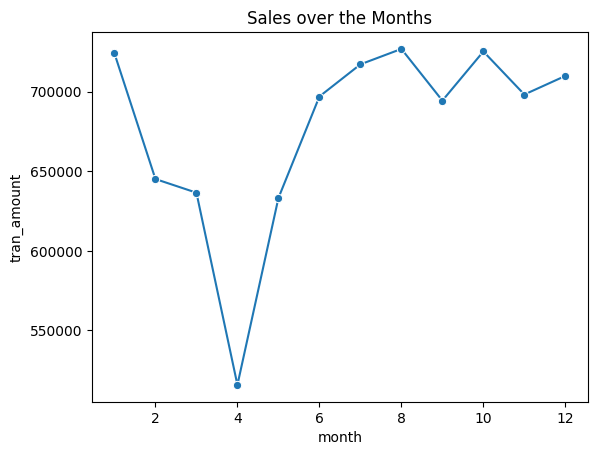

In [195]:
#seaborn version
sns.lineplot(
    data=mon_sale,
    x='month',
    y='tran_amount',
    marker='o'
)

plt.title('Sales over the Months')
plt.show()
